## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [40]:
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

### <b> Подключим библиотеки:

In [41]:
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt

# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
# Подключение библиотеки для загрузки готовых моделей
from tensorflow.keras.models import load_model

### <b> Загрузим ранее полученную в практическом ноутбуке натренированную модель:

In [42]:
savedModel=load_model('model_full.h5')
savedModel.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 800)               628000    
                                                                 
 dense_26 (Dense)            (None, 400)               320400    
                                                                 
 dense_27 (Dense)            (None, 10)                4010      
                                                                 
Total params: 952410 (3.63 MB)
Trainable params: 952410 (3.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Загрузим картинку, преобразуем её в массив и выведим для проверки:

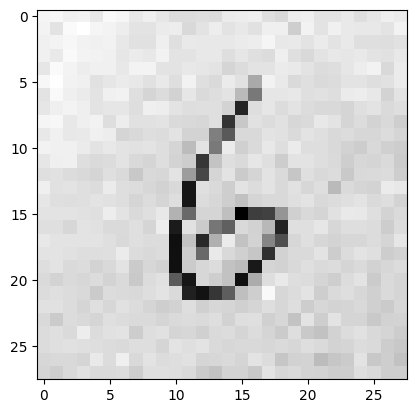

In [43]:
# Функцией image загружаем изображение
temp = image.load_img('cifra.jpg', target_size=(28, 28), color_mode = 'grayscale')

# Переводим картинку в массив
img_array = image.img_to_array(temp)

# Выводим картинку для проверки
plt.imshow(img_array, cmap='gray')

### <b> Предобработка изображения и его распознавание </b>
Проведем операции по инвертированию и нормализации изображения, запустим распознавание

(1, 784)
1/1 [==============================] - 0s 45ms/step
[[3.4045431e-01 3.6438900e-07 1.2898462e-06 1.6242706e-05 3.6449865e-08
  1.8661158e-02 6.4059156e-01 2.7418172e-04 5.3755502e-07 3.5627394e-07]]
Распознана цифра: 6


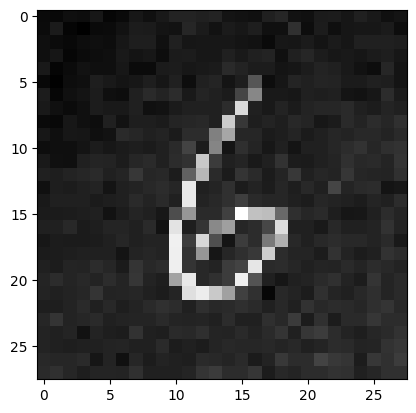

In [44]:
# Инвертируем картинку
inverted_img_array = 255 - img_array

# Выводим картинку для проверки
plt.imshow(inverted_img_array, cmap='gray')

# # Добавление одной оси в начале
inverted_img_array = np.expand_dims(inverted_img_array, axis=0)

# Изменение формы входных картинок с 28х28 на 784
img_array_reshaped = img_array.reshape(inverted_img_array.shape[0], -1)

# Нормализация картинки
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
img_array_reshaped = img_array_reshaped.astype('float32') / 255.
print(img_array_reshaped.shape)

# Распознавание картинки
prediction = savedModel.predict(img_array_reshaped)

# Вывод результата - вектор из 10 чисел
print(prediction)

# Получение и вывод индекса самого большого элемента
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')